In [89]:
##__author__ federica bianco @fedhere
## for CUSP NYU PUI class
from __future__ import print_function, division
import pandas as pd
import os
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline



Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**  This is what we did in today's midterm review. 
Topics that we got questions about:
    - groupby
    - subsample
    - linear and multivariate regression
    - 

# data acquisition

In [90]:
#download, move data to $PUIDATA, and read data in 
#curl did not work with this URL, reverted to wget
!wget https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv


--2017-10-25 14:19:31--  https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv
Resolving data.cityofnewyork.us... 52.206.140.199
Connecting to data.cityofnewyork.us|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: “rows.csv”

    [  <=>                                  ] 4,433,512   12.2M/s   in 0.3s    

Last-modified header invalid -- time-stamp ignored.
2017-10-25 14:19:31 (12.2 MB/s) - “rows.csv” saved [4433512]



In [91]:
cmd = "mv rows.csv " + os.getenv("PUIDATA")
#the line below is to check that my string is formatted right. I should remove it to make the notebook delivery ready
print (cmd)
#os.system should return 0 if no errors
os.system(cmd)

mv rows.csv /home/cusp/fbianco/PUIdata


0

In [92]:
#check that the data is there
!ls $PUIDATA

2010 Census Tracts.geojson    NYPD_7_Major_Felony_Incidents.csv
201501-citibike-tripdata.csv  Prison Bookings 2010.xls
201501-citibike-tripdata.zip  PUIdata
201506-citibike-tripdata.csv  PUIdataNYCzips.geojson
201506-citibike-tripdata.zip  rows.csv
ACS_10_5YR_S1901.zip	      zbp00totals.zip
DEC_00_SF1_DP1.csv	      zbp10totals.zip
DEC_00_SF3_DP3.zip	      ZIP_CODE_040114.dbf
DEC_10_SF1_SF1DP1.csv	      ZIP_CODE_040114.prj
IntrotoStats_Table6_1.csv     ZIP_CODE_040114.sbn
Manhattan		      ZIP_CODE_040114.sbx
nybb_16d		      ZIP_CODE_040114.shp
nyct2010_16c.zip	      ZIP_CODE_040114.shp.xml
NYCzips.geojson		      ZIP_CODE_040114.shx


In [93]:
#read in data
test = pd.read_csv(os.getenv("PUIDATA") + "/rows.csv")

In [94]:
test.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#its good to desceribe the data: this will take stats on the numerical column. it can tell me:
# what columns have numerical values (the otehrs will not be reported)
# what the mean, std, count of the non-NaN entries in the column are. 
# what the min and max are, which can help spot outliers
# what the percentiles are, which can help spot outliers, know if there are NaN's (cant calculate the w NaN) 
test.describe()

,Record Number,BBL,Postcode,DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN
count,16170.000000,1.601400e+04,14432.00000,1.446500e+04,14465.000000,11686.000000,11686.000000,11686.000000,11686.000000,11686.000000,1.141800e+04
mean,8085.500000,2.240854e+09,10595.81929,2.022015e+05,1.901348,40.752086,-73.956860,7.009156,16.524388,4907.768698,1.876091e+06
std,4668.021262,1.234669e+09,574.66546,5.360972e+05,5.826292,0.080706,0.049349,4.017144,15.938979,13491.266349,1.022346e+06
min,1.000000,1.000010e+09,10001.00000,5.000800e+04,1.000000,40.516065,-74.243582,1.000000,1.000000,1.000000,1.000000e+06
25%,4043.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8085.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12127.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,16170.000000,5.079910e+09,11697.00000,2.760000e+07,152.000000,40.912869,-73.715543,56.000000,51.000000,155101.000000,5.166094e+06


In [96]:
#check the size of my dataset
test.shape

(16170, 32)

In [97]:
# if it is very large you should subsample and work with a manageable data size!
#selecting 100 random entries from the dataset with pd.sample
#test2 = test.sample(100)
#selecting by broadcasting: this selects everty 100th row from my data, stating w row 0
test2 = test[::100] 

In [98]:
test2.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,21,1.000160e+09,NaN,1000160140,1000059,200,VESEY STREET,Manhattan,10281.0,Filed,...,2249866.0,Office,1.0,40.714447,-74.015493,1.0,1.0,31703.0,1000059.0,Battery Park City-Lower Manhattan ...
200,68,1.000250e+09,NaN,1000250001,1000821,55,BROAD STREET,Manhattan,10004.0,Filed,...,406025.0,Office,1.0,40.705189,-74.011505,1.0,1.0,9.0,1000821.0,Battery Park City-Lower Manhattan ...
300,192,1.000920e+09,NaN,1000920005,1001269;1001270,161,WILLIAM STREET,Manhattan,10038.0,Filed,...,177433.0,College/University,1.0,40.710059,-74.005955,1.0,1.0,1501.0,1001269.0,Battery Park City-Lower Manhattan ...
400,360,1.003310e+09,NaN,1003310120,1-00331-0120,530,GRAND STREET,Manhattan,10002.0,Filed,...,532006.0,Multifamily Housing,2.0,40.714413,-73.981437,3.0,1.0,12.0,1076783.0,Lower East Side ...


In [99]:
#it may be a good idea to save the resulting dataframe, 
# so if anything goes wrong you do not need to reread the large dataframe in which may be time consuming
# you can just reread your smaller subset
# saving with pandas
test2.to_csv("mytest.csv")

In [100]:
#rereading the dataframe
test3 = pd.read_csv("mytest.csv")

In [101]:
#notice that the index got written to the csv file in a column without name
!head mytest.csv

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1000410001.0,,1000410001,1001007,,,Manhattan,,BBL not valid,,Not Available,,Not Available,Not Available,,,Not Available,,,,918919,,Office,,,,,,,,
100,21,1000160140.0,,1000160140,1000059,200,VESEY STREET,Manhattan,10281.

In [102]:
#when I reread the dataframe that I saved the original index is stored in a column called "Unnamed: 0"
test3.head(2)

,Unnamed: 0,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,21,1.000160e+09,NaN,1000160140,1000059,200,VESEY STREET,Manhattan,10281.0,...,2249866.0,Office,1.0,40.714447,-74.015493,1.0,1.0,31703.0,1000059.0,Battery Park City-Lower Manhattan ...


In [103]:
#to restore the dataframe as I had it originally I can use pd.set_index()
test3.set_index("Unnamed: 0", inplace=True)

In [104]:
test3.head(2)

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,21,1.000160e+09,NaN,1000160140,1000059,200,VESEY STREET,Manhattan,10281.0,Filed,...,2249866.0,Office,1.0,40.714447,-74.015493,1.0,1.0,31703.0,1000059.0,Battery Park City-Lower Manhattan ...


In [105]:
#to refer to a row of a dataframe I can use .loc and the name of the row (the index) 
# or .iloc and the sequential number of that row
test3.iloc[1]["BBL"] , test3.loc[100]["BBL"]

(1000160140.0, 1000160140.0)

In [106]:
for i,ind in enumerate(test3.index.values[:3]):
    print(test3.loc[ind][3], test3.iloc[i][3])

1000410001 1000410001
1000160140 1000160140
1000250001 1000250001


In [107]:
#dropping missing observations: if I must to use a particular feature (column) in my analysis it makes 
# sense to drop the 
# observations (row) that have missing values in that columns
# here I remove observations (buildings) with no zipcode. 
# Make sure you undesrtand how to dropna on different axes and the difference between any and all
test3.dropna(subset=["Postcode"], inplace=True)

In [108]:
#now I can convert the postcode to integers, from float as whey were. If NaN are in the column I cannot do this conversion
test3["Postcode"] = test3.Postcode.astype(int)

In [109]:
#groupby allows me to aggregate data, say I want to aggregate buildings by borough

In [110]:
test3.groupby(by = "Borough")

In [111]:
#this is a "groupby object". Now I can ask whatever metric I want for each group, and have a dataframe returned to me

In [112]:
#this counts the number of valid features (valid entries in each column) in each borough
test3.groupby(by = "Borough").count()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Postcode,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,20,20,3,18,18,20,20,20,20,17,...,20,17,20,20,20,20,20,20,19,20
Brooklyn,28,28,2,23,23,28,28,28,28,21,...,28,22,28,28,28,28,28,28,27,28
Manhattan,65,65,2,54,54,65,65,65,65,50,...,65,53,65,64,64,64,64,64,64,64
Queens,29,29,1,25,25,29,29,29,29,21,...,29,25,29,0,0,0,0,0,0,0
Staten Island,4,4,1,3,3,4,4,4,4,2,...,4,2,4,4,4,4,4,4,4,4


In [113]:
#notice the index is the groupby category. Often it may be useful to have that as a column instead:
test3.groupby(by = "Borough", as_index=False).count()

,Borough,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,Bronx,20,20,3,18,18,20,20,20,20,...,20,17,20,20,20,20,20,20,19,20
1,Brooklyn,28,28,2,23,23,28,28,28,28,...,28,22,28,28,28,28,28,28,27,28
2,Manhattan,65,65,2,54,54,65,65,65,65,...,65,53,65,64,64,64,64,64,64,64
3,Queens,29,29,1,25,25,29,29,29,29,...,29,25,29,0,0,0,0,0,0,0
4,Staten Island,4,4,1,3,3,4,4,4,4,...,4,2,4,4,4,4,4,4,4,4


In [114]:
test3.groupby(by = "Borough").count()["BBL"]

Borough
Bronx            20
Brooklyn         28
Manhattan        65
Queens           29
Staten Island     4
Name: BBL, dtype: int64

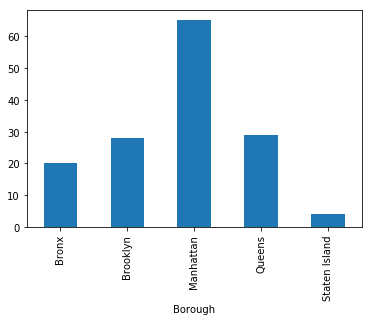

In [115]:
test3.groupby(by = "Borough").count()["BBL"].plot(kind="bar");


In [116]:
#about models, statsmodels allows to create simple models, with dataframe features, univariate, multivariate, 
# higher degree polunomials...

In [117]:
test3.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BI

In [146]:
#predicting BBL from postcode and latitude. A really bad idea, especially singe BBL is encoded as 
#a number in the billions... but just to demonstrate
smf.ols(formula = 'BBL ~ Postcode + Latitude ', 
                          data = test3).fit().summary()
#actually the model is really good R^2=70%! that is largely because the building number is in the billions...
# and the features are all three considered important (look at the p value <0.000! in the second table. small p-value
#means the feature is important)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           1.16e-27
Time:                        14:24:07   Log-Likelihood:                -2509.6
No. Observations:                 116   AIC:                             5025.
Df Residuals:                     113   BIC:                             5033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.371e+11   3.49e+10      3.922      0.000      6.78e+10  2.06e+11
Postcode    1.339e+06   1.39e+05      9.629      0.000      1.06e+06  1.61e+06
Latitude   -3.661e+09   8.38e+08     -4.370      0.000     -5.32e+09    -2e+09
==============================================================================
Omnibus:                      102.409   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.056
Skew:                           3.155   Prob(JB):                    2.80e-177
Kurtosis:                      14.331   Cond. No.                     6.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
test3["wEUI"] =\
        pd.to_numeric(test3["Weather Normalized Source EUI(kBtu/ft2)"], errors="coerce").astype(float)

In [152]:
smf.ols(formula = 'BBL ~ Postcode + Latitude + wEUI', 
                          data = test3).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     90.05
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           1.79e-24
Time:                        14:25:28   Log-Likelihood:                -1637.8
No. Observations:                  77   AIC:                             3284.
Df Residuals:                      73   BIC:                             3293.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.011e+10    3.3e+10      0.307      0.760     -5.56e+10  7.58e+10
Postcode    1.659e+06   1.29e+05     12.827      0.000       1.4e+06  1.92e+06
Latitude   -6.288e+08   7.89e+08     -0.797      0.428      -2.2e+09  9.43e+08
wEUI       -4097.5715   2.03e+04     -0.202      0.841     -4.46e+04  3.64e+04
==============================================================================
Omnibus:                      142.143   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8374.196
Skew:                           6.532   Prob(JB):                         0.00
Kurtosis:                      52.391   Cond. No.                     6.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
#unsurprisingly, the enrgy consumption is not a good predictor of BBL, 
# but notice that the new model also change the importance of latitude.  
# Be careful when you do feature importance from models! careful about covariances especially